# 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
import cv2
from sklearn.model_selection import train_test_split

In [2]:
#載入影像
import os
import cv2
import numpy as np
directory = "./data_2"
files = os.listdir(directory)
faces = []
y = np.empty((40,))
index = 0
for i in files:
    img = cv2.imread("./data_2/"+i)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # 色彩轉換成黑白
    img_np = np.array(gray,'uint8')
    faces.append(img_np)
    y[index] = i[0]
    index += 1
X = np.empty((40,400,400))
for i , array in enumerate(faces):
    X[i] = array 

In [3]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
X_train, X_test = X_train / 255.0,X_test / 255.0

In [4]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print(X_train.shape)

(28, 400, 400, 1)


In [5]:
# 共有多少種種類
K = len(set(y_train))
print("number of classes:", K)

number of classes: 2


In [6]:
i = Input(shape=X_train[0].shape)
x = Conv2D(3, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(10, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [7]:
# i = Input(shape=X_train[0].shape)
# x = Conv2D(32, (3, 3),  activation='relu')(i)
# x = Conv2D(64, (3, 3),  activation='relu')(x)
# x = MaxPooling2D(pool_size=(2, 2))(x)
# x = Conv2D(64, (3, 3),  activation='relu')(x)
# x = Conv2D(128, (3, 3),  activation='relu')(x)
# x = MaxPooling2D(pool_size=(2, 2))(x)
# x = Flatten()(x)
# x = Dropout(0.2)(x)
# x = Dense(256, activation='relu')(x)
# x = Dropout(0.2)(x)
# x = Dense(K, activation='softmax')(x)

# model = Model(i, x)

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
1/1 [==============================] - 11s 11s/step - loss: 0.6971 - accuracy: 0.4286 - val_loss: 20.4902 - val_accuracy: 0.3333
Epoch 2/50
1/1 [==============================] - 8s 8s/step - loss: 12.4793 - accuracy: 0.5714 - val_loss: 8.6071 - val_accuracy: 0.6667
Epoch 3/50
1/1 [==============================] - 7s 7s/step - loss: 14.6558 - accuracy: 0.4286 - val_loss: 2.2408 - val_accuracy: 0.6667
Epoch 4/50
1/1 [==============================] - 7s 7s/step - loss: 4.0827 - accuracy: 0.4286 - val_loss: 0.9292 - val_accuracy: 0.3333
Epoch 5/50
1/1 [==============================] - 7s 7s/step - loss: 0.6447 - accuracy: 0.5714 - val_loss: 0.7495 - val_accuracy: 0.6667
Epoch 6/50
1/1 [==============================] - 7s 7s/step - loss: 1.1906 - accuracy: 0.4286 - val_loss: 0.7749 - val_accuracy: 0.3333
Epoch 7/50
1/1 [==============================] - 7s 7s/step - loss: 0.6109 - accuracy: 0.6429 - val_loss: 0.9068 - val_accuracy: 0.3333
Epoch 8/50
1/1 [====================

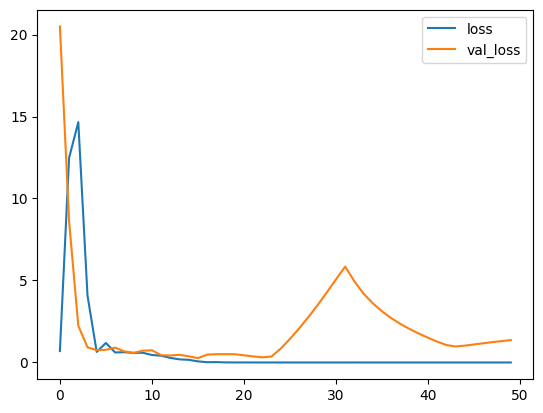

In [9]:
# 繪出迭代損失
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

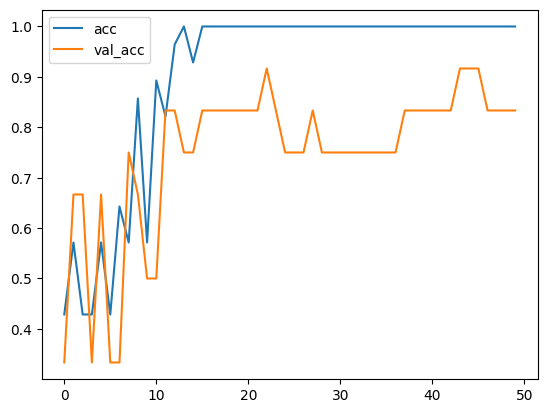

In [10]:
# 繪出迭代精準度
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [11]:
# 映射標籤
labels = '''da_q
jolin
eddie'''.split("\n")
labels

['da_q', 'jolin', 'eddie']

1/1 [==============================] - 1s 594ms/step


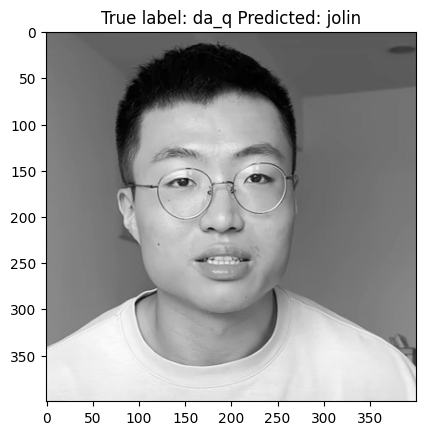

In [12]:
# 展示分類錯誤樣本
p_test = model.predict(X_test).argmax(axis=1)
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i].reshape(400,400), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[int(y_test[i])], labels[int(p_test[i])]));

In [13]:
misclassified_idx

array([ 8, 11], dtype=int64)

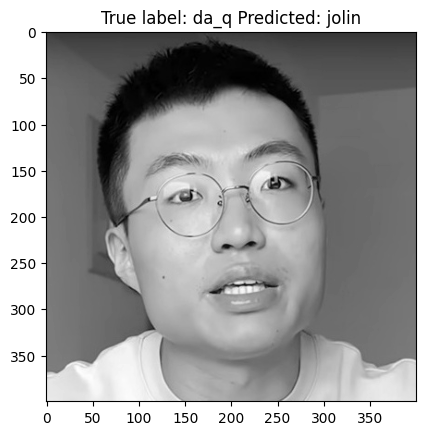

In [14]:

i = 11
plt.imshow(X_test[i].reshape(400,400), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[int(y_test[i])], labels[int(p_test[i])]));

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=15,       # 隨機旋轉角度範圍
    width_shift_range=0.1,   # 水平平移範圍
    height_shift_range=0.1,  # 垂直平移範圍
    shear_range=0.1,         # 剪切強度
    zoom_range=0.2,          # 隨機縮放範圍
    horizontal_flip=True     # 水平翻轉
)
# 使用ImageDataGenerator對訓練數據進行資料擴增
datagen.fit(X_train)
# 使用fit_generator方法訓練模型，並傳入資料擴增器
r = model.fit_generator(
    datagen.flow(X_train, y_train, batch_size=10), validation_data=(X_test, y_test), epochs=50
)

Epoch 1/50


C:\Users\sis87\AppData\Local\Temp\ipykernel_30140\3390806543.py:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(datagen.flow(X_train, y_train, batch_size=10), validation_data=(X_test, y_test), epochs=50)


3/3 [==============================] - 13s 3s/step - loss: 0.2939 - accuracy: 0.8571 - val_loss: 0.6791 - val_accuracy: 0.7500
Epoch 2/50
3/3 [==============================] - 10s 3s/step - loss: 0.2266 - accuracy: 0.8929 - val_loss: 0.1863 - val_accuracy: 0.9167
Epoch 3/50
3/3 [==============================] - 9s 3s/step - loss: 0.2304 - accuracy: 0.8929 - val_loss: 0.0467 - val_accuracy: 1.0000
Epoch 4/50
3/3 [==============================] - 9s 3s/step - loss: 0.2444 - accuracy: 0.8929 - val_loss: 0.0315 - val_accuracy: 1.0000
Epoch 5/50
3/3 [==============================] - 9s 3s/step - loss: 0.0982 - accuracy: 1.0000 - val_loss: 0.0676 - val_accuracy: 1.0000
Epoch 6/50
3/3 [==============================] - 9s 3s/step - loss: 0.1259 - accuracy: 0.9643 - val_loss: 0.0554 - val_accuracy: 1.0000
Epoch 7/50
3/3 [==============================] - 9s 3s/step - loss: 0.1767 - accuracy: 0.8929 - val_loss: 0.0252 - val_accuracy: 1.0000
Epoch 8/50
3/3 [==============================] - 

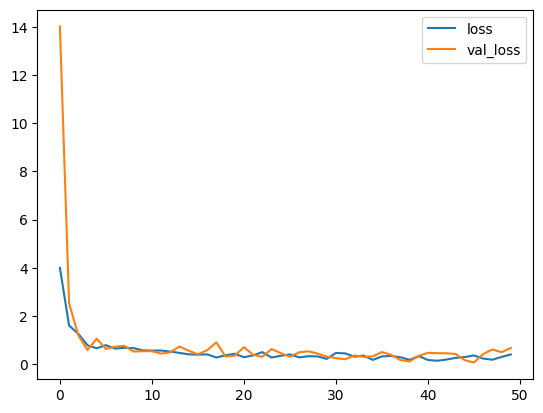

In [16]:
# 繪出迭代損失
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

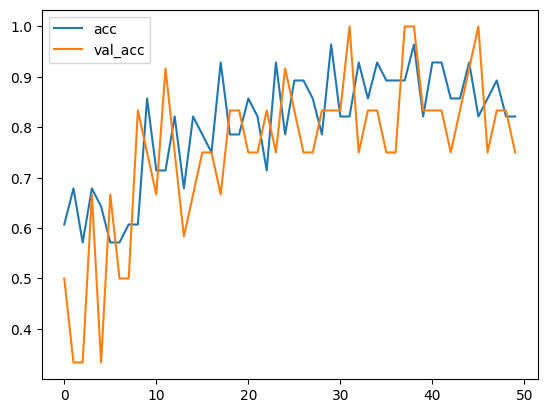

In [17]:
# 繪出迭代精準度
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [18]:
datagen.fit(X_train)

1/1 [==============================] - 0s 473ms/step


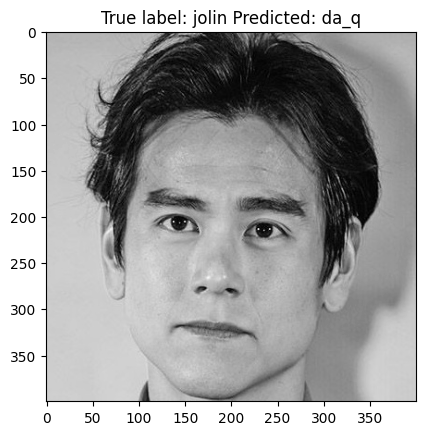

In [20]:
# 展示分類錯誤樣本
p_test = model.predict(X_test).argmax(axis=1)
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i].reshape(400,400), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[int(y_test[i])], labels[int(p_test[i])]));

In [21]:
misclassified_idx

array([10], dtype=int64)